In [4]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time


In [5]:
from orbithunter.convolutional_neural_networks import orbit_cnn
from orbithunter.gluing import tile_dictionary_ks

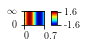

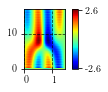

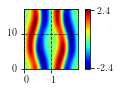

In [6]:
td = tile_dictionary_ks(padded=False)

td[0].plot()

td[1].plot()

td[2].plot()

tile_dictionary = rediscretize_tiling_dictionary(td, new_shape=(16,16))

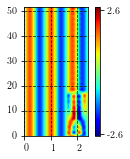

In [7]:
glue_shape = (3, 3)
symbol_arrays = generate_symbol_arrays(tile_dictionary, glue_shape=glue_shape, unique=True)

tiling_example = tile(symbol_arrays[0], tile_dictionary, OrbitKS)

tiling_example.plot()

In [8]:
symbol_arrays[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [ ]:
from collections import Counter
symbol_arrays = generate_symbol_arrays(td, glue_shape, unique=True)
X = []
symbol_y = []
converge_y = []

for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    X.append(tiling.state)
    symbol_counter = Counter(sa.ravel().tolist())
    symbol_y.append([symbol_counter[0], symbol_counter[1], symbol_counter[2]])
y = symbol_y

In [9]:
from collections import Counter
symbol_arrays = generate_symbol_arrays(td, glue_shape, unique=True)
X = []
symbol_y = []
converge_y = []

for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    X.append(tiling.state)
    symbol_counter = Counter(sa.ravel().tolist())
    symbol_y.append(sa.ravel())
y = symbol_y

In [10]:
np.array(y).shape, np.array(X).shape

((2176, 9), (2176, 32, 32))

In [12]:
cnn, history, ((X_train, y_train), (X_test,  y_test)) = orbit_cnn(X, y, dimension=2, verbose=True, epochs=100) 

Train on 1740 samples, validate on 436 samples
Epoch 1/100
1740/1740 [==============================] - 2s 1ms/sample - loss: 0.4824 - val_loss: 0.1599
Epoch 2/100
1740/1740 [==============================] - 1s 841us/sample - loss: 0.0882 - val_loss: 0.0426
Epoch 3/100
1740/1740 [==============================] - 1s 795us/sample - loss: 0.0154 - val_loss: 0.0062
Epoch 4/100
1740/1740 [==============================] - 1s 778us/sample - loss: 0.0048 - val_loss: 0.0044
Epoch 5/100
1740/1740 [==============================] - 1s 763us/sample - loss: 0.0039 - val_loss: 0.0036
Epoch 6/100
1740/1740 [==============================] - 1s 748us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 7/100
1740/1740 [==============================] - 1s 739us/sample - loss: 0.0033 - val_loss: 0.0034
Epoch 8/100
1740/1740 [==============================] - 1s 742us/sample - loss: 0.0033 - val_loss: 0.0034
Epoch 9/100
1740/1740 [==============================] - 1s 730us/sample - loss: 0.0032 - val_loss:

Epoch 76/100
1740/1740 [==============================] - 1s 697us/sample - loss: 0.0029 - val_loss: 0.0029
Epoch 77/100
1740/1740 [==============================] - 1s 702us/sample - loss: 0.0029 - val_loss: 0.0029
Epoch 78/100
1740/1740 [==============================] - 1s 690us/sample - loss: 0.0028 - val_loss: 0.0029
Epoch 79/100
1740/1740 [==============================] - 1s 699us/sample - loss: 0.0028 - val_loss: 0.0029
Epoch 80/100
1740/1740 [==============================] - 1s 701us/sample - loss: 0.0028 - val_loss: 0.0029
Epoch 81/100
1740/1740 [==============================] - 1s 661us/sample - loss: 0.0028 - val_loss: 0.0029
Epoch 82/100
1740/1740 [==============================] - 1s 659us/sample - loss: 0.0029 - val_loss: 0.0030
Epoch 83/100
1740/1740 [==============================] - 1s 657us/sample - loss: 0.0028 - val_loss: 0.0029
Epoch 84/100
1740/1740 [==============================] - 1s 664us/sample - loss: 0.0029 - val_loss: 0.0029
Epoch 85/100
1740/1740 [====

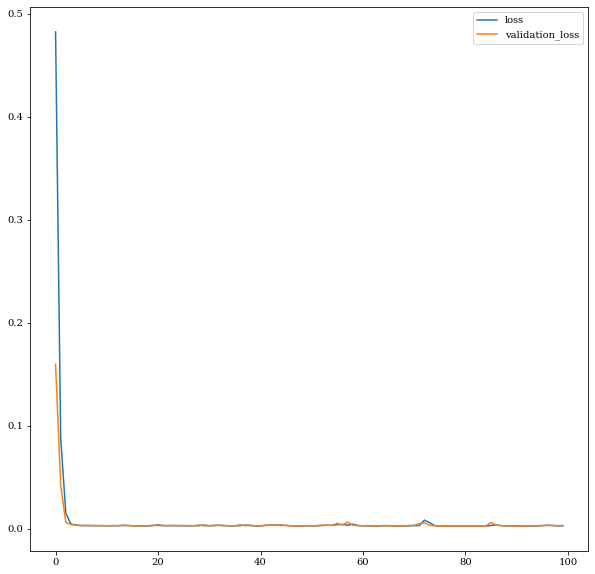

In [13]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(10,10))
_ = plt.plot(history.history['loss'])
_ = plt.plot(history.history['val_loss'])
_ = plt.legend(('loss', 'validation_loss'))
_ = plt.show()

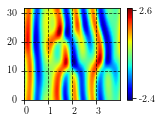

In [25]:
example_orbit_ = read_h5('OrbitKS_T31p619_L35p379.h5', directory='../data/local/OrbitKS/')
example_orbit_.plot()
example_orbit_ = rediscretize(example_orbit_, new_shape=(32,32))

Example L: 37.297088186899444 Sum_L for Tiles 37.000844133611395


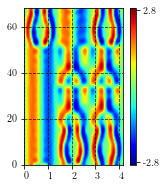

In [21]:
print('Example L:', example_orbit_.L, 'Sum_L for Tiles', td[0].L + td[1].L + td[2].L)
guess_symbol_array = np.array([[0,1, ],[2,0,0],[2,0,0]])
approximate_tiling = rediscretize(tile(guess_symbol_array, td, OrbitKS), new_shape=(32, 32))
approximate_tiling.plot()

In [16]:
print(np.matrix(guess_symbol_array))

test_converge_result = converge(approximate_tiling, method='hybrid')
test_tiling = test_converge_result.orbit

NameError: name 'guess_symbol_array' is not defined

In [17]:
test_tiling.rotate(-0.25, axis=1).plot()
example_orbit_.plot()

NameError: name 'test_tiling' is not defined

In [23]:
cnn.predict(example_orbit_.convert(to='field').state.reshape(1, 32, 32, 1)).astype(int)

array([[0, 1, 2, 0, 1, 1, 1, 1, 1]])

In [13]:
from sklearn.metrics import mean_squared_error

y_predict = cnn.predict(X_test)
mse_array = mean_squared_error(y_test, y_predict)

In [14]:
y_bottleneck = []
for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    y_bottleneck.append(gudhi_distance(tiling, example_orbit_, metric='bottleneck'))
y = y_bottleneck

In [15]:
bottleneck_cnn, history, ((X_train, y_train), (X_test,  y_test)) = orbit_cnn(X, y, dimension=2) 

Train on 1740 samples, validate on 436 samples
Epoch 1/100
1740/1740 [==============================] - 2s 890us/sample - loss: 0.1276 - val_loss: 0.0511
Epoch 2/100
1740/1740 [==============================] - 1s 646us/sample - loss: 0.0413 - val_loss: 0.0336
Epoch 3/100
1740/1740 [==============================] - 1s 630us/sample - loss: 0.0312 - val_loss: 0.0263
Epoch 4/100
1740/1740 [==============================] - 1s 645us/sample - loss: 0.0288 - val_loss: 0.0239
Epoch 5/100
1740/1740 [==============================] - 1s 633us/sample - loss: 0.0230 - val_loss: 0.0205
Epoch 6/100
1740/1740 [==============================] - 1s 699us/sample - loss: 0.0202 - val_loss: 0.0252
Epoch 7/100
1740/1740 [==============================] - 1s 738us/sample - loss: 0.0199 - val_loss: 0.0182
Epoch 8/100
1740/1740 [==============================] - 1s 631us/sample - loss: 0.0142 - val_loss: 0.0142
Epoch 9/100
1740/1740 [==============================] - 1s 636us/sample - loss: 0.0125 - val_los

As a baseline, let's see how well it predicts the distance between the example orbit and itself: The expected value is of course, 0.

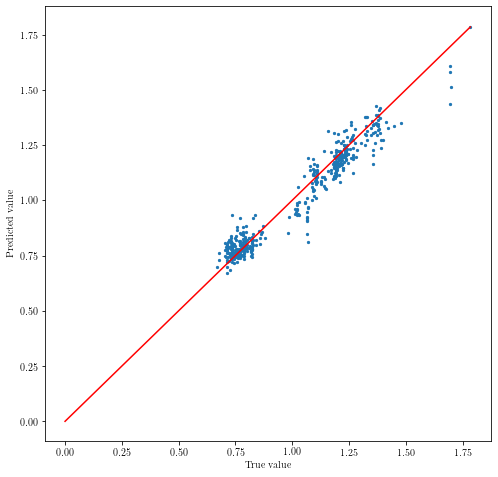

In [17]:
gudhi_distance(example_orbit_, example_orbit_, metric='bottleneck')

bottleneck_cnn.predict(example_orbit_.convert(to='field').state.reshape(1, 32, 32, 1))

bottleneck_cnn.predict(test_tiling.convert(to='field').state.reshape(1, 32, 32, 1))

y_predict = bottleneck_cnn.predict(X_test)

fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(y_test, y_predict, s=5)
_ = ax.plot([0,y_test.max()],[0,y_test.max()], color='r')
_ = plt.xlabel('True value')
_ = plt.ylabel('Predicted value')
_ = plt.show()